# Test `surface_currents` Module

Render figure object produced by the `nowcast.figures.fvcom.surface_currents` module.
Provides data for visual testing to confirm that refactoring has not adversely changed figure for web page.

Set-up and function call replicates as nearly as possible what is done in the `nowcast.workers.make_plots` worker.

Notebooks like this should be developed in a
[Nowcast Figures Development Environment](https://salishsea-nowcast.readthedocs.io/en/latest/figures/fig_dev_env.html)
so that all of the necessary dependency packages are installed.
The development has to be done on a workstation that has the Vancouver Harbour & Fraser River FVCOM model results `/opp/` parition mounted.

In [1]:
import io
from pathlib import Path

import arrow
import netCDF4
import yaml

from nowcast.figures.fvcom.research import surface_currents

In [2]:
%matplotlib inline

The bits of `config/nowcast.yaml` that are required:

In [3]:
config = '''
    vhfr fvcom runs:
        results archive:
            nowcast x2: /opp/fvcom/nowcast-x2/
'''

config = yaml.load(io.StringIO(config))

The bits that the `make_plots` worker must provide:

In [4]:
run_date = arrow.get('2019-02-27')
model_config = 'x2'
run_type = 'nowcast'

ddmmmyy = run_date.format('DDMMMYY').lower()
results_dir = Path(
    config["vhfr fvcom runs"]["results archive"][f"{run_type} {model_config}"], ddmmmyy
)
fvcom_results_dataset = netCDF4.Dataset(results_dir/f"vh_{model_config}_0001.nc")

## Render the Figure

One time step, and one section for quickest testing:

2.97 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


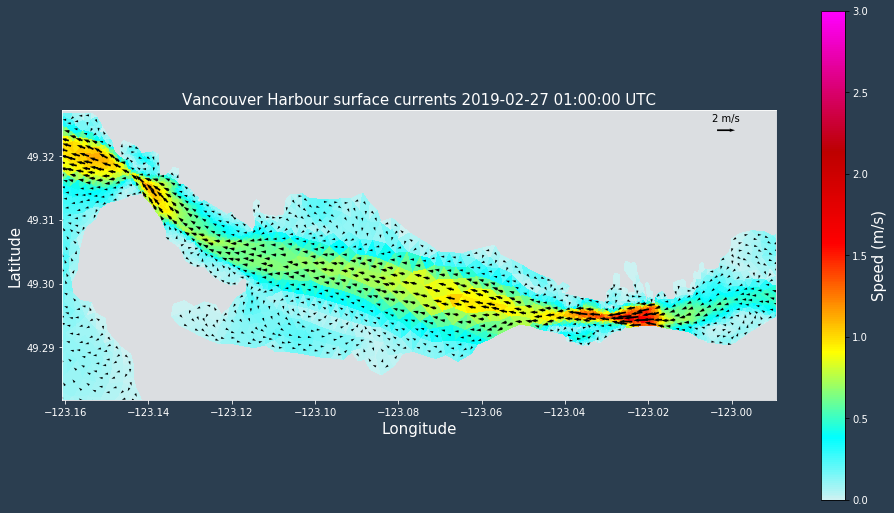

In [5]:
%%timeit -n1 -r1

from importlib import reload
reload(surface_currents)

names = {
    "English Bay": "EnglishBay_surface_currents",
    "Vancouver Harbour": "VancouverHarbour_surface_currents",
    "Indian Arm": "IndianArm_surface_currents",
}
time_index = 0
fig = surface_currents.make_figure(
    "Vancouver Harbour", time_index, fvcom_results_dataset
)

All sections:

7.17 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


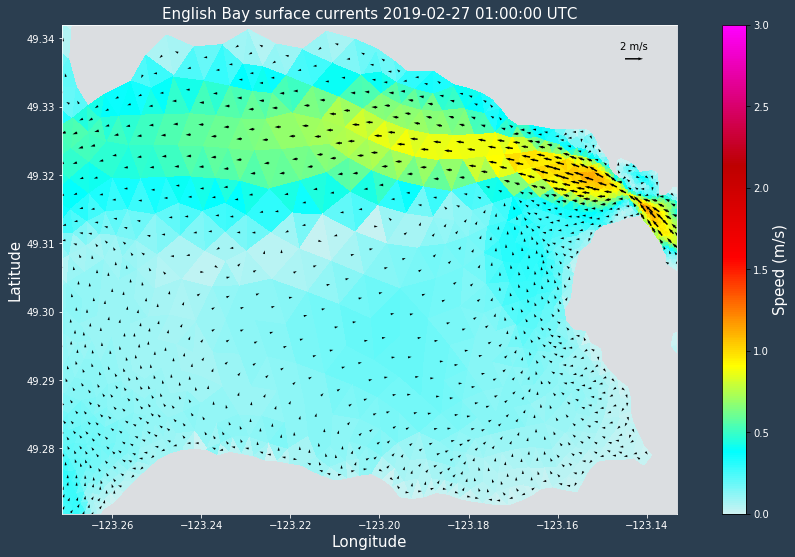

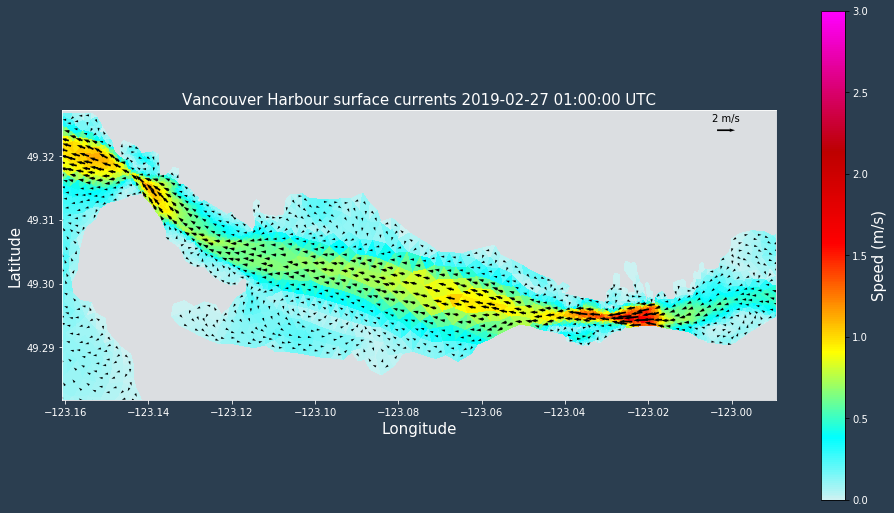

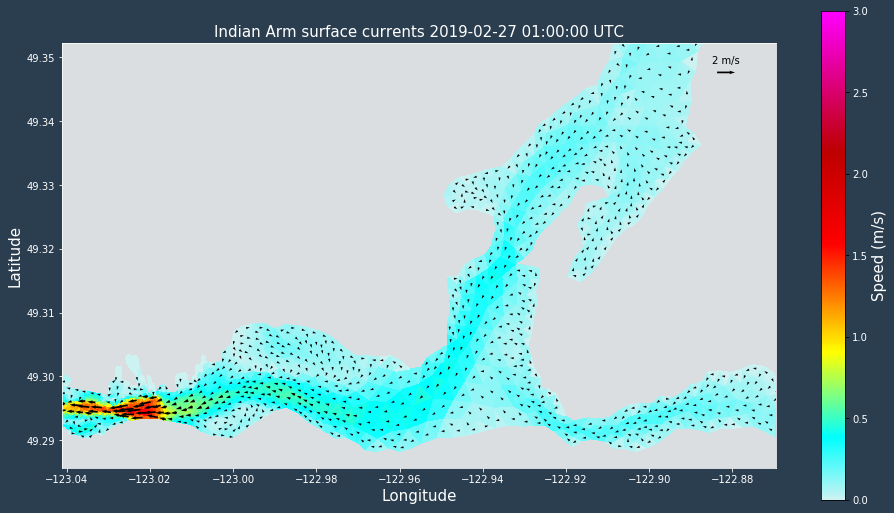

In [6]:
%%timeit -n1 -r1

from importlib import reload
reload(surface_currents)

names = {
    "English Bay": "EnglishBay_surface_currents",
    "Vancouver Harbour": "VancouverHarbour_surface_currents",
    "Indian Arm": "IndianArm_surface_currents",
}
time_index = 0
for place in names:
    fig = surface_currents.make_figure(
        place, time_index, fvcom_results_dataset
    )